In [212]:
import numpy as np  
import matplotlib.pyplot as plt
import os
import librosa
import librosa.display
import IPython.display as ipd

In [213]:
voice_path = '/home/s/Ai/nltk_s/data/voice/'

easy = 'voice_easy.wav'
hard = 'voice_hard.wav'

In [214]:
voice_easy, sr = librosa.load(os.path.join(voice_path, easy))
voice_hard, _ = librosa.load(os.path.join(voice_path, hard))
# 위 sample rate와 같은 주파수영역 사용하기 위해 "_" 사용

In [215]:
#음원 >> time domain을 축으로 그리는 함수
def draw_wave(sample_sounds, sample_rate):
    plt.figure(figsize=(12,6))
    librosa.display.waveshow(sample_sounds, sample_rate, alpha=0.2)
    plt.xlabel("Time (sec)"); plt.ylabel("Amplitude")
    plt.title("Waveform"); plt.show()

In [216]:
ipd.Audio(os.path.join(voice_path, easy))


<ipython-input-215-b964727780c6>:4: FutureWarning: Pass sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(sample_sounds, sample_rate, alpha=0.2)


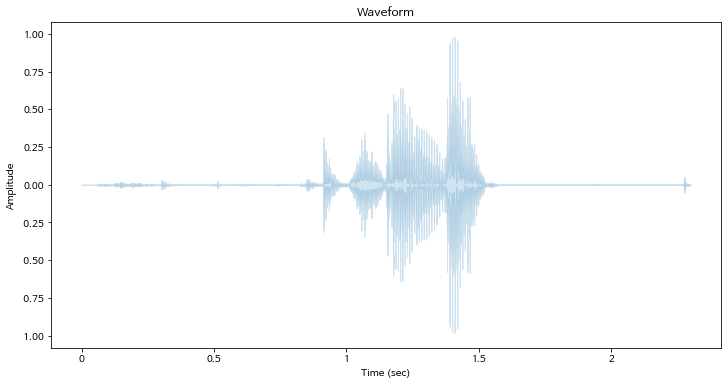

In [217]:
draw_wave(voice_easy, sr)

In [218]:
ipd.Audio(os.path.join(voice_path, hard))

<ipython-input-215-b964727780c6>:4: FutureWarning: Pass sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(sample_sounds, sample_rate, alpha=0.2)


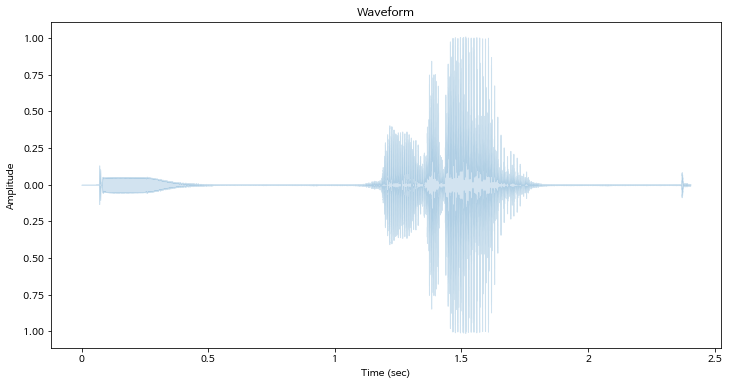

In [219]:
draw_wave(voice_hard, sr)

easy1, sr = librosa.load(os.path.join(voice_path, easy))
hard1, _ = librosa.load(os.path.join(voice_path, hard))

In [220]:
voice_easy.shape

(50688,)

In [221]:
voice_easy_ft = np.fft.fft(voice_easy)
voice_easy_ft.shape

(50688,)

In [222]:
voice_easy_ft[0] #복소수가 있음을 확인

(0.6709841275911298+0j)

In [223]:
magnitude_voice_easy = np.abs(voice_easy_ft) #절댓값 씌워서 복소수 제거

In [224]:
magnitude_voice_easy[0] #복소수 제거된 실제 magnitude

0.6709841275911298

In [225]:
# def plot_magnitude_spectrum(sample_sounds, title, sr):
#     ft = np.fft.fft(sample_sounds)
#     magnitude = np.abs(ft)
#     frequency = np.linspace(0, sr, len(magnitude))
    
#     # FFT변환한 결과로 나온 specturm은 대칭구조의 모습을 보인다.
#     # high frequency 부분 반절을 잘라내고 앞쪽 반절만 사용.
#     left_frequency = frequency[:int(len(frequency)/2)]
#     left_magnitude = magnitude[:int(len(magnitude)/2)]

#     plt.figure(figsize=(15, 5))
#     plt.plot(left_frequency, left_magnitude)
#     plt.title(title)
#     plt.xlabel('frequency (Hz)')
#     plt.ylabel('magnitude')
    
#     plt.show()

In [226]:
# plot_magnitude_spectrum(easy1, "voice_easy", sr)


In [227]:
# FFT결과를 그리는 함수
def plot_magnitude_spectrum(sample_sounds, title, sr, freq_ratio=1):
    ft = np.fft.fft(sample_sounds)
    magnitude = np.abs(ft)
    frequency = np.linspace(0, sr, len(magnitude))
    
    
    frequency_bin = int(len(frequency) * freq_ratio)
    # FFT변환한 결과로 나온 spectrum은 대칭구조의 모습을 보인다.
    # freq_ration값을 곱해서 원하는 배수만큼 자를 수 있다.
    # frequency_bin :주파수 해상도
    
    plt.figure(figsize=(15, 5))
    plt.plot(frequency[:frequency_bin], magnitude[:frequency_bin])
    plt.title(title)
    plt.xlabel('frequency (Hz)')
    plt.ylabel('magnitude')
    
    plt.show()

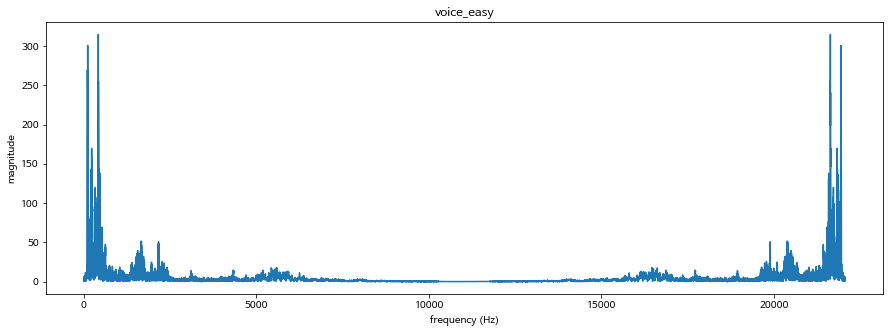

In [228]:
plot_magnitude_spectrum(voice_easy, "voice_easy", sr, 1)
# 22,050Hz가 default 

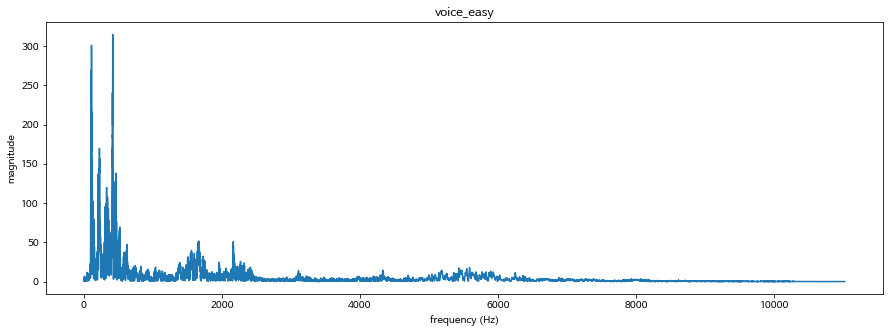

In [229]:
plot_magnitude_spectrum(voice_easy, "voice_easy", sr, 0.5)
# 0.5값을 줘서 대칭되는 것 중 전면부만 사용

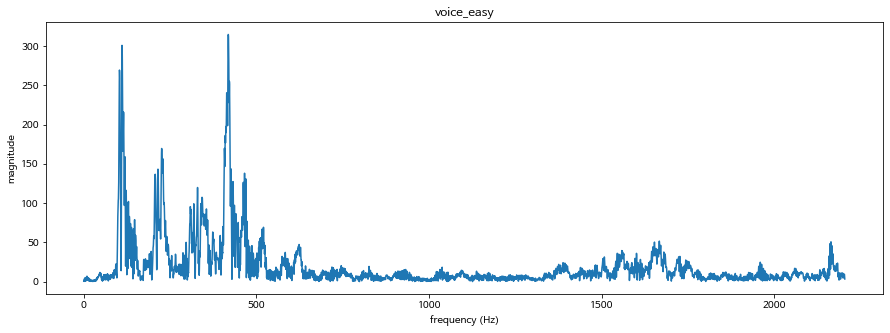

In [230]:
plot_magnitude_spectrum(voice_easy, "voice_easy", sr, 0.1)
#유효한 스펙트럼까지 슬라이싱

In [231]:
# #librosa가 제공하는 STFT 결과 얻어오는 함수
# def get_stft(sample_sounds):
#     return librosa.stft(sample_sounds)
# #stft한 결과를 그리는 함수
# def draw_stft(sample_sounds, ylim=(None, None)):
#     plt.figure(figsize=(12,6))
#     librosa.display.specshow(np.abs(get_stft(sample_sounds)),
#                              y_axis='hz', x_axis='s')
#     plt.ylim(ylim); plt.grid(); plt.show()

In [232]:
# #STFT를 통해 생성된 matrix
# S = np.abs(librosa.stft(voice_easy))
# S

In [233]:
#mel filter bank
melfb = librosa.filters.mel(sr=16000, n_fft=2048, fmax=8000)
melfb


array([[-0.        ,  0.01428889,  0.02857778, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.00043527,
         0.00021763,  0.        ]], dtype=float32)

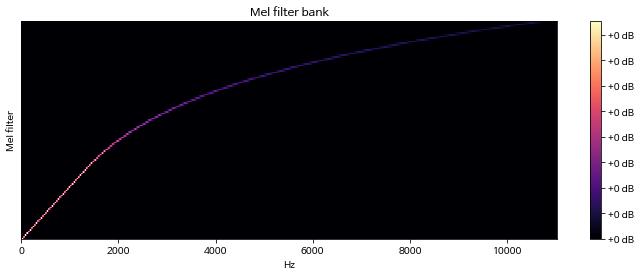

In [234]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
librosa.display.specshow(melfb, x_axis='linear')
plt.ylabel('Mel filter')
plt.title('Mel filter bank')
plt.colorbar(format='%+02.0f dB')

<ipython-input-235-2b6eba09c450>:1: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00163173 -0.00141811
 -0.00139962] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(voice_easy, sr=sr, n_mels=128, fmax=8000)


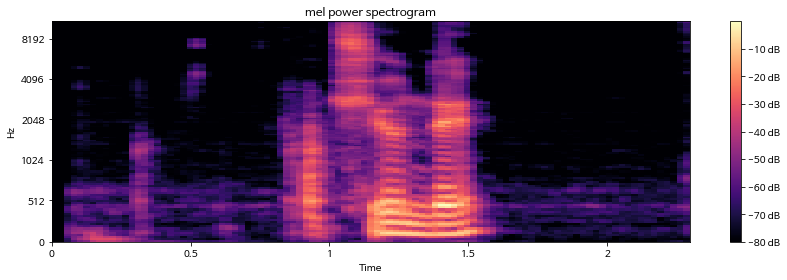

In [235]:
S = librosa.feature.melspectrogram(voice_easy, sr=sr, n_mels=128, fmax=8000) 
 
S_dB= librosa.power_to_db(S, ref=np.max)
plt.figure(figsize=(12, 4))
img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr)
plt.colorbar(format='%+02.0f dB')
plt.title('mel power spectrogram')
plt.tight_layout()
plt.show()

In [236]:
#sacling
min_level_db = -100
 
def normalize(S):
    return np.clip((S - min_level_db) / -min_level_db, 0, 1)

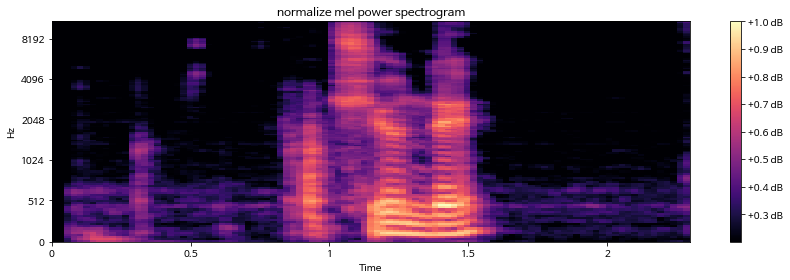

In [237]:
normalize_S = normalize(S_dB)
 
plt.figure(figsize=(12, 4))
librosa.display.specshow(normalize_S, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+0.1f dB')
plt.title('normalize mel power spectrogram')
plt.tight_layout()
plt.show()

/tmp/ipykernel_41726/3718614336.py:13: FutureWarning: Pass sr=16000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(sample_sounds, sample_rate, alpha=0.2)


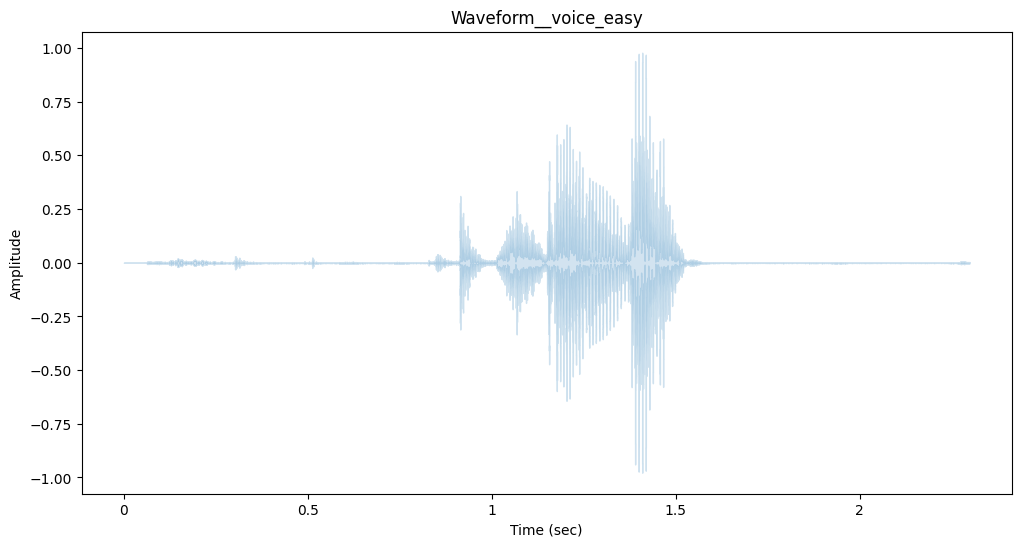

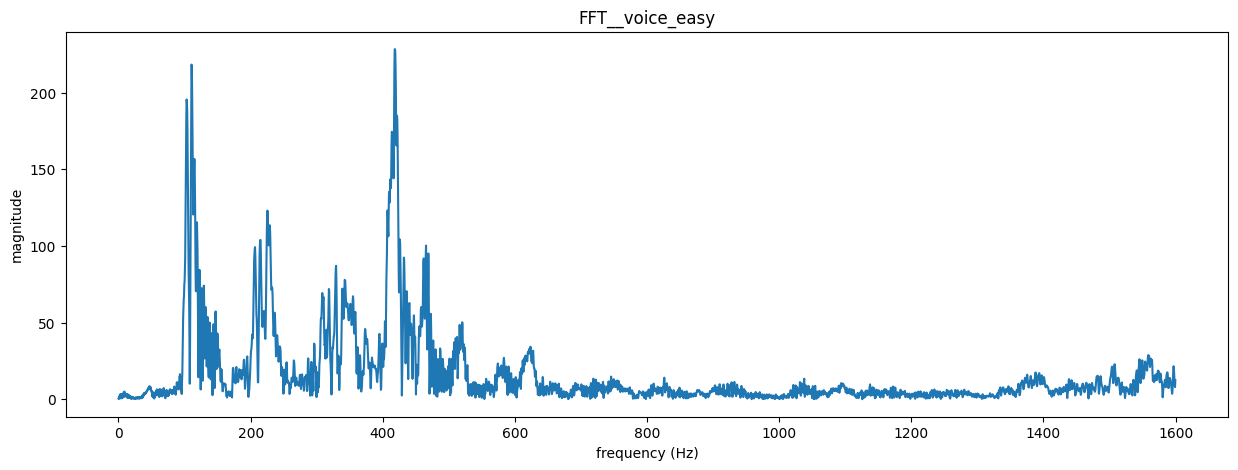

/tmp/ipykernel_41726/3718614336.py:35: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00167074 -0.00148454
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(sample_sounds, sr=sr, n_mels=128, fmax=8000)


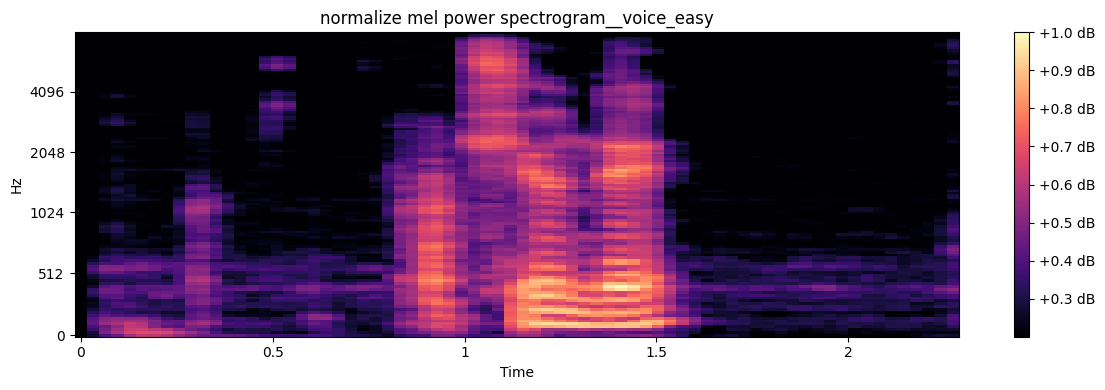

/home/s/venv/nltk/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45908 (\N{HANGUL SYLLABLE DEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/s/venv/nltk/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50892 (\N{HANGUL SYLLABLE WEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


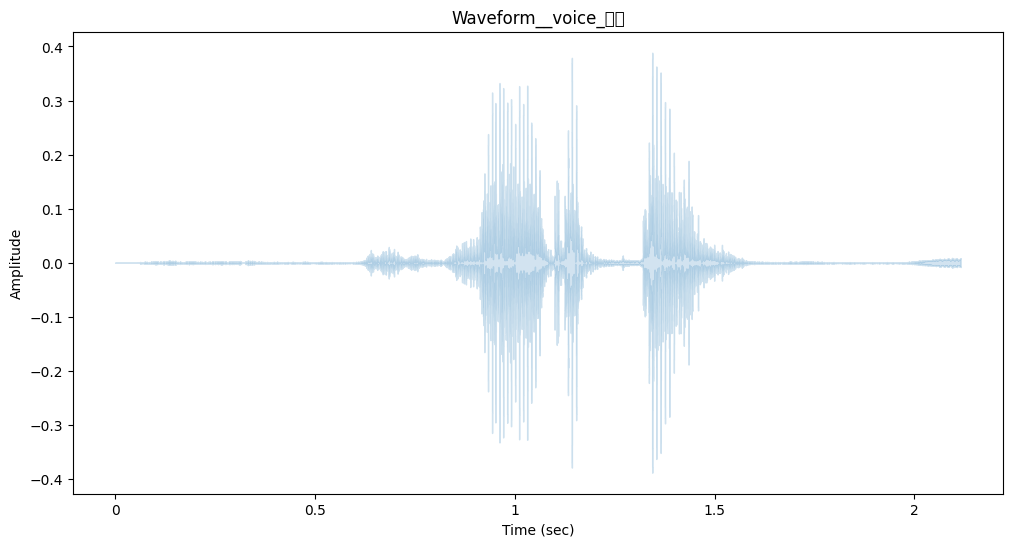

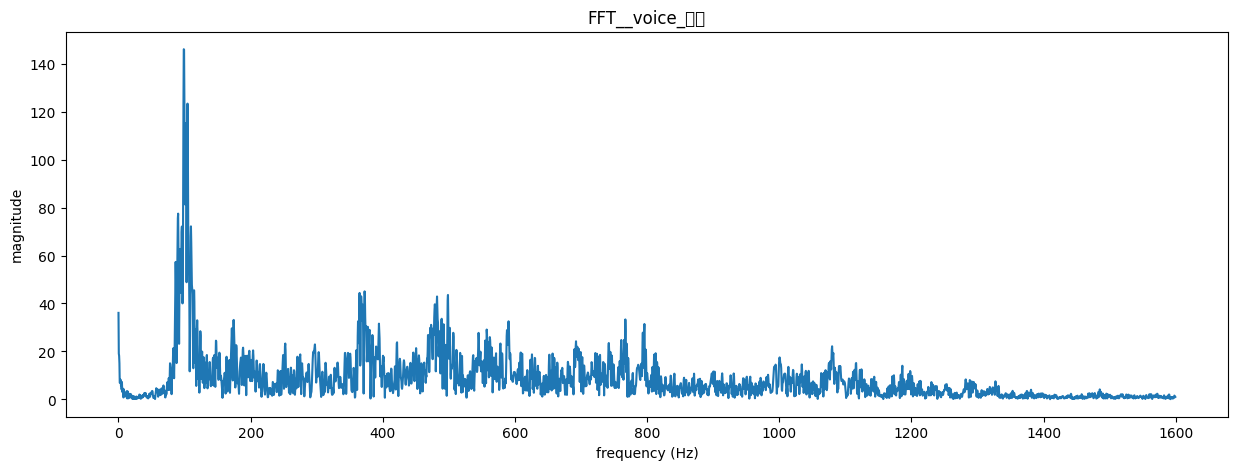

/tmp/ipykernel_41726/3718614336.py:35: FutureWarning: Pass y=[0.         0.         0.         ... 0.00692556 0.00790198 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(sample_sounds, sr=sr, n_mels=128, fmax=8000)
/tmp/ipykernel_41726/3718614336.py:43: UserWarning: Glyph 45908 (\N{HANGUL SYLLABLE DEO}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_41726/3718614336.py:43: UserWarning: Glyph 50892 (\N{HANGUL SYLLABLE WEO}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_41726/3718614336.py:45: UserWarning: Glyph 45908 (\N{HANGUL SYLLABLE DEO}) missing from current font.
  plt.savefig(path + file_path.split('/')[7].split('.')[0] + '.png')
/tmp/ipykernel_41726/3718614336.py:45: UserWarning: Glyph 50892 (\N{HANGUL SYLLABLE WEO}) missing from current font.
  plt.savefig(path + file_path.split('/')[7].split('.')[0] + '.png')


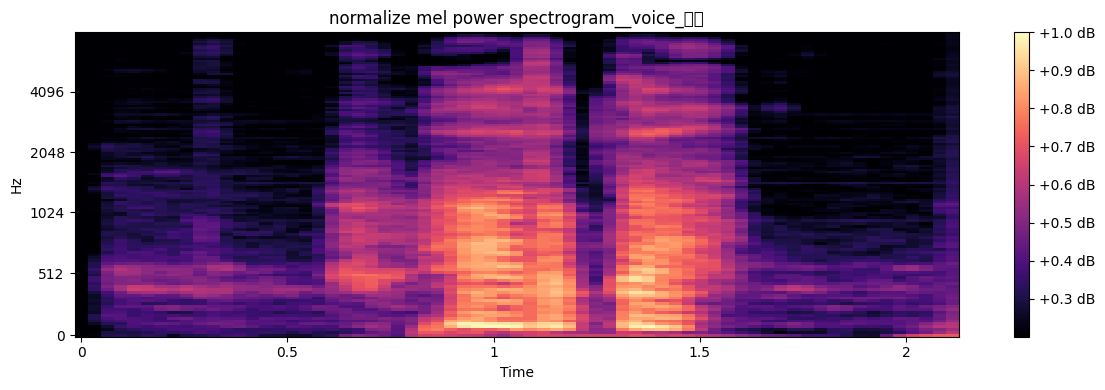

/home/s/venv/nltk/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 52572 (\N{HANGUL SYLLABLE COE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/s/venv/nltk/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/s/venv/nltk/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50556 (\N{HANGUL SYLLABLE YA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


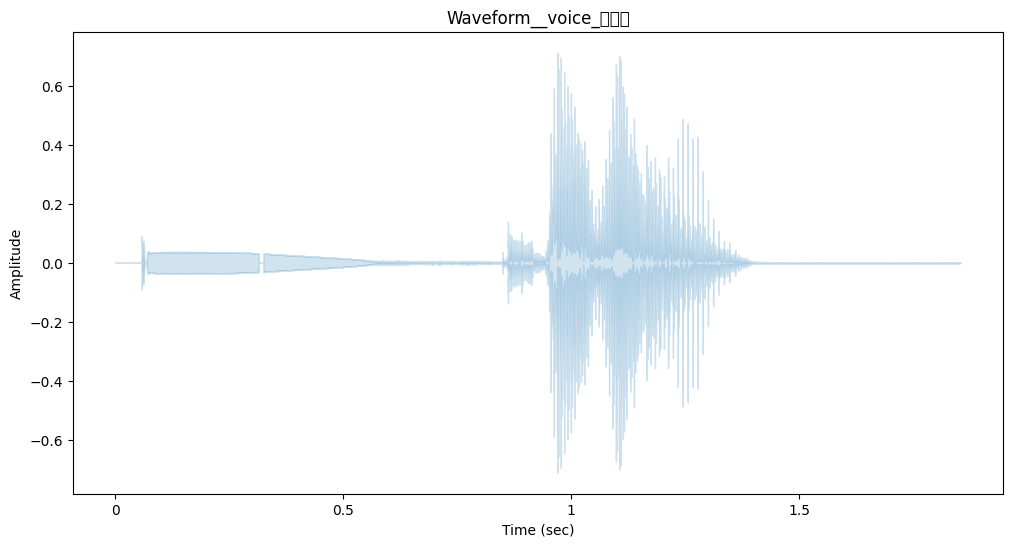

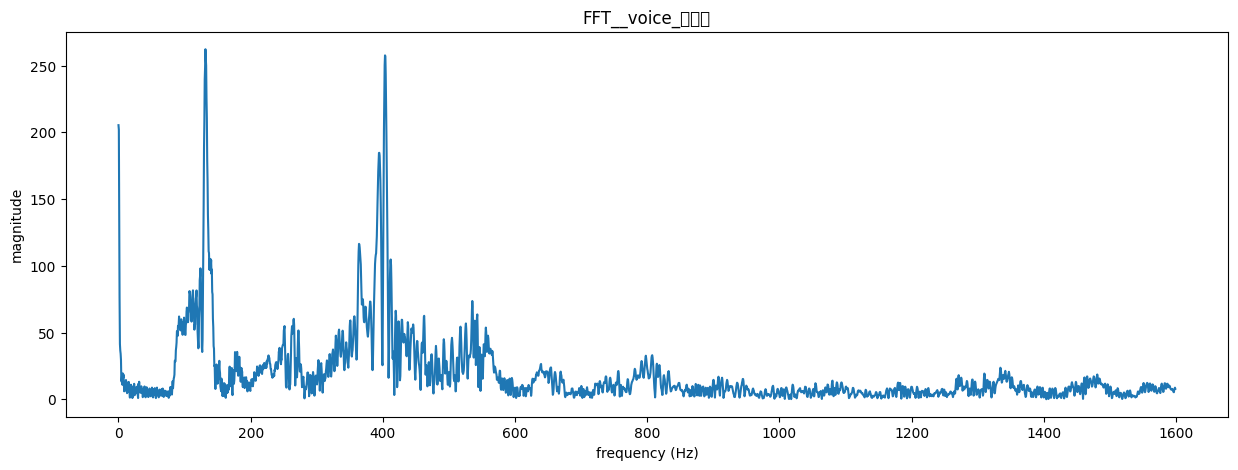

/tmp/ipykernel_41726/3718614336.py:35: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00034917 -0.00018617
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(sample_sounds, sr=sr, n_mels=128, fmax=8000)
/tmp/ipykernel_41726/3718614336.py:43: UserWarning: Glyph 52572 (\N{HANGUL SYLLABLE COE}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_41726/3718614336.py:43: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_41726/3718614336.py:43: UserWarning: Glyph 50556 (\N{HANGUL SYLLABLE YA}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_41726/3718614336.py:45: UserWarning: Glyph 52572 (\N{HANGUL SYLLABLE COE}) missing from current font.
  plt.savefig(path + file_path.split('/')[7].split('.')[0] + '.png')
/tmp/ipykernel_41726/3718614336.py:45: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE

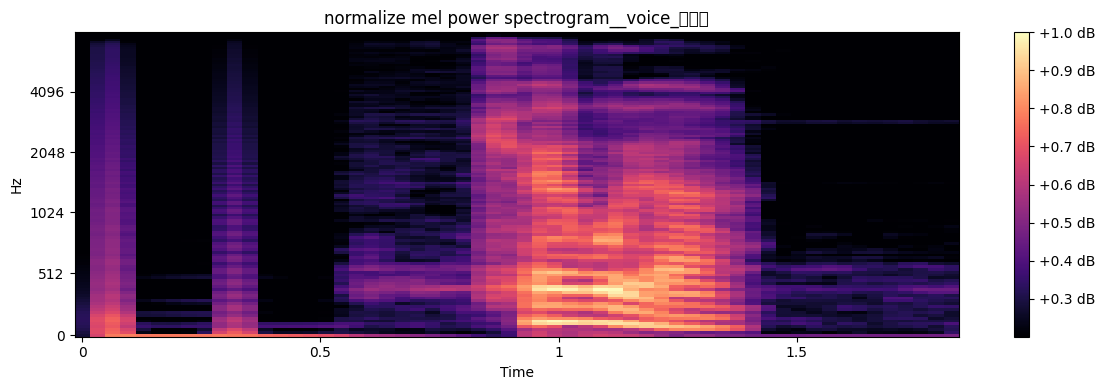

/home/s/venv/nltk/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/s/venv/nltk/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51613 (\N{HANGUL SYLLABLE JEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/s/venv/nltk/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


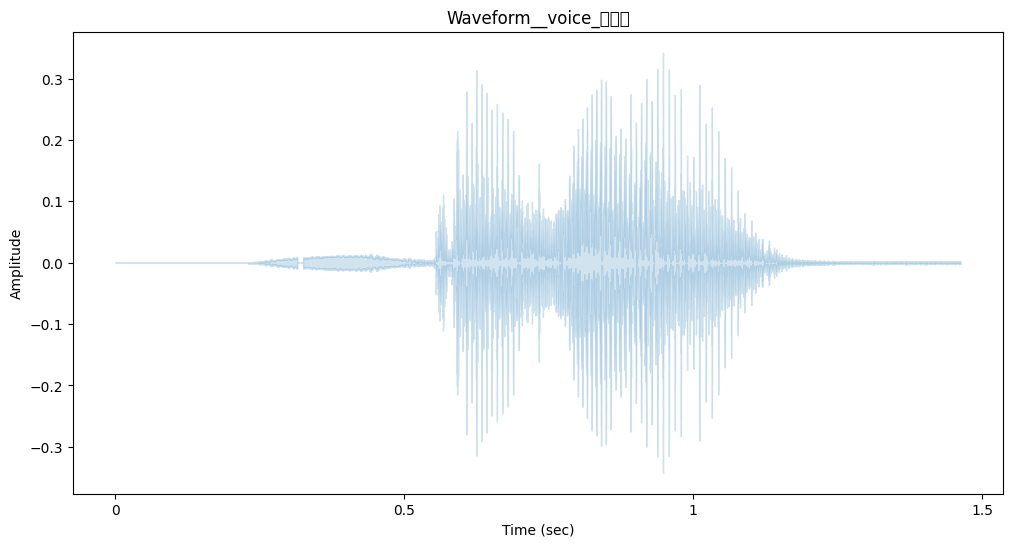

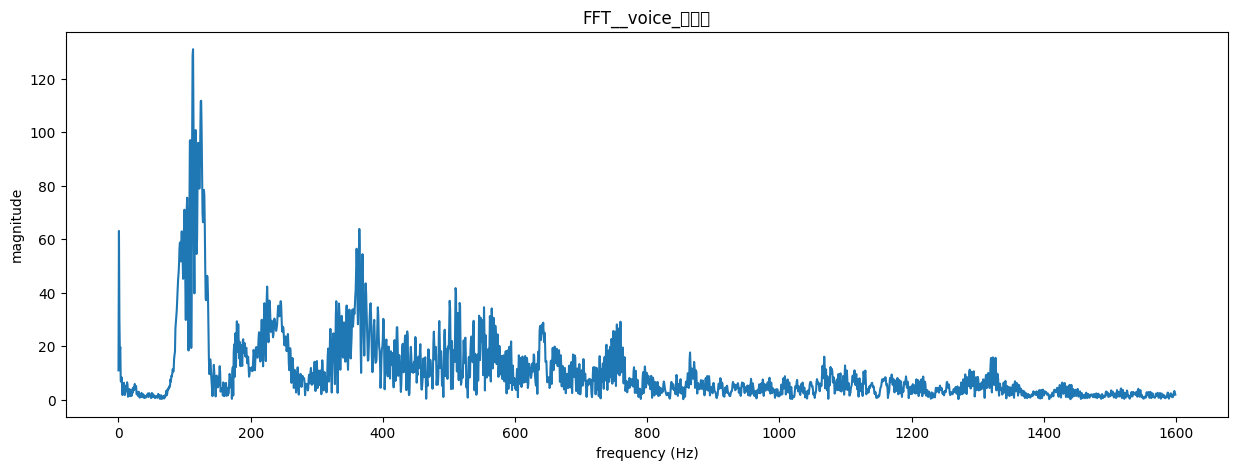

/tmp/ipykernel_41726/3718614336.py:35: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00142954 -0.00161286
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(sample_sounds, sr=sr, n_mels=128, fmax=8000)
/tmp/ipykernel_41726/3718614336.py:43: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_41726/3718614336.py:43: UserWarning: Glyph 51613 (\N{HANGUL SYLLABLE JEUNG}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_41726/3718614336.py:43: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_41726/3718614336.py:45: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  plt.savefig(path + file_path.split('/')[7].split('.')[0] + '.png')
/tmp/ipykernel_41726/3718614336.py:45: UserWarning: Glyph 51613 (\N{HANGUL SYLLA

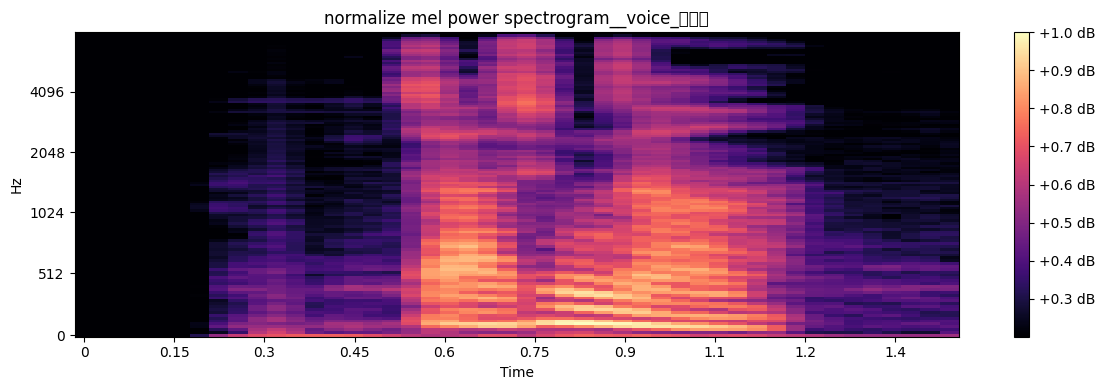

/home/s/venv/nltk/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 52628 (\N{HANGUL SYLLABLE CU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


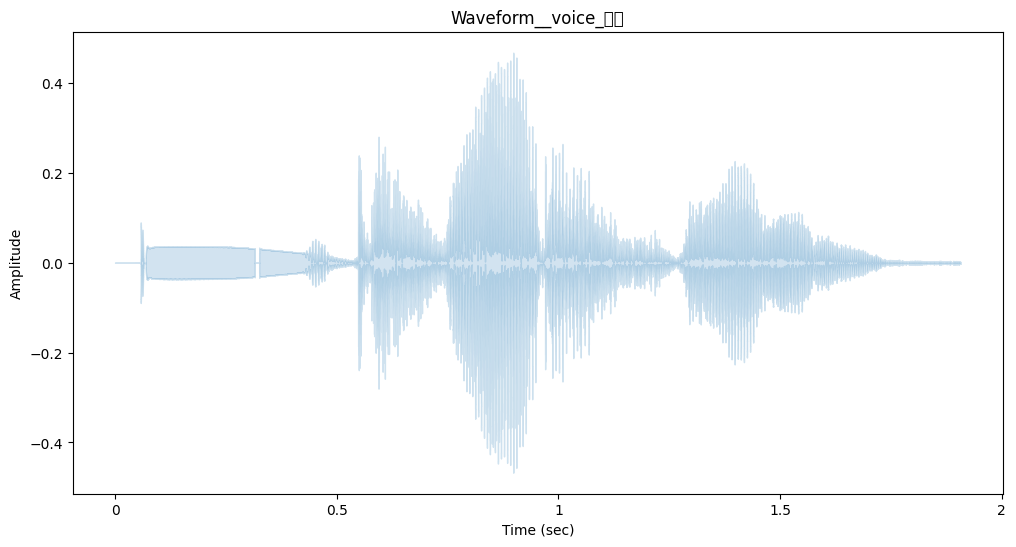

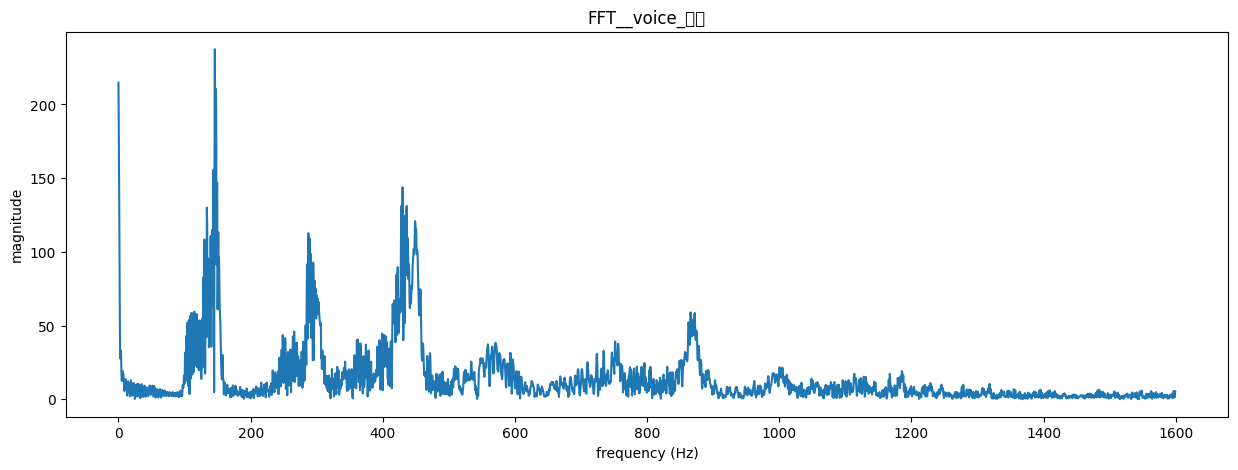

/tmp/ipykernel_41726/3718614336.py:35: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00070099 -0.00100678
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(sample_sounds, sr=sr, n_mels=128, fmax=8000)
/tmp/ipykernel_41726/3718614336.py:43: UserWarning: Glyph 52628 (\N{HANGUL SYLLABLE CU}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_41726/3718614336.py:45: UserWarning: Glyph 52628 (\N{HANGUL SYLLABLE CU}) missing from current font.
  plt.savefig(path + file_path.split('/')[7].split('.')[0] + '.png')


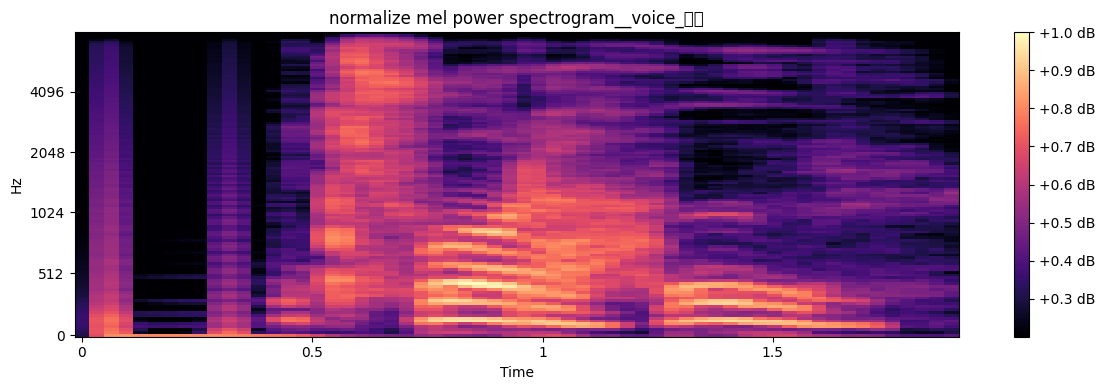

/home/s/venv/nltk/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51339 (\N{HANGUL SYLLABLE JOH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/s/venv/nltk/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50500 (\N{HANGUL SYLLABLE A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


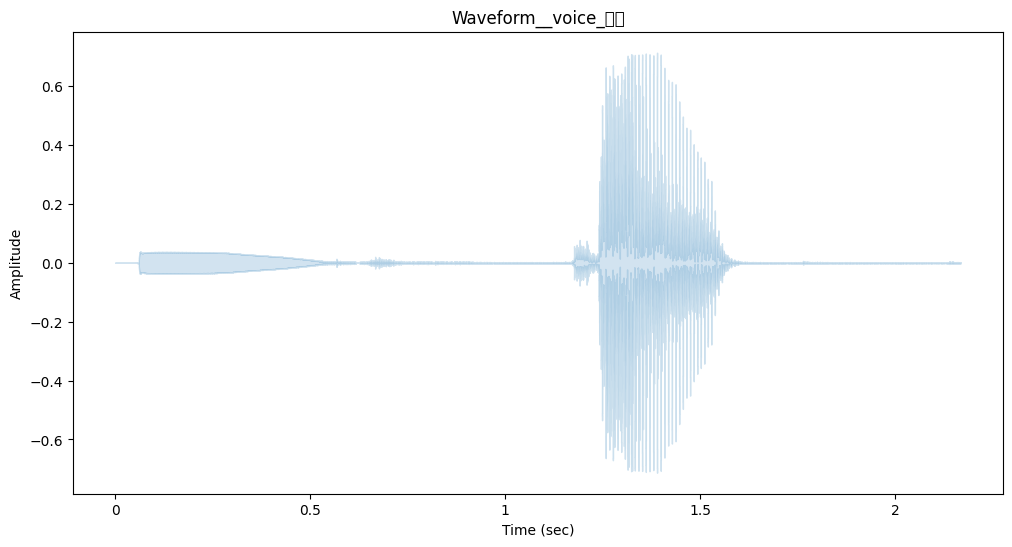

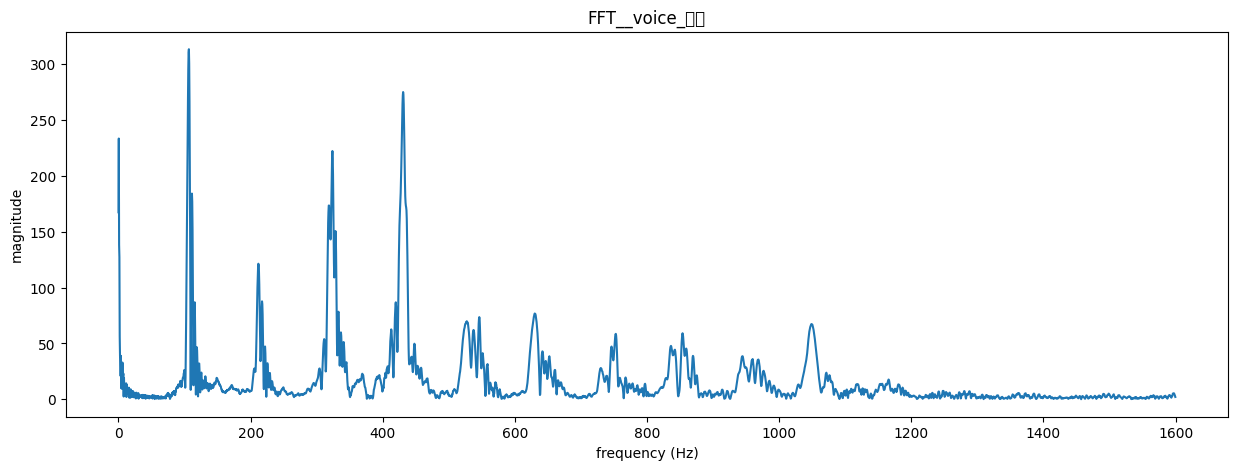

/tmp/ipykernel_41726/3718614336.py:35: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.0007431  -0.00062638
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(sample_sounds, sr=sr, n_mels=128, fmax=8000)
/tmp/ipykernel_41726/3718614336.py:43: UserWarning: Glyph 51339 (\N{HANGUL SYLLABLE JOH}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_41726/3718614336.py:43: UserWarning: Glyph 50500 (\N{HANGUL SYLLABLE A}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_41726/3718614336.py:45: UserWarning: Glyph 51339 (\N{HANGUL SYLLABLE JOH}) missing from current font.
  plt.savefig(path + file_path.split('/')[7].split('.')[0] + '.png')
/tmp/ipykernel_41726/3718614336.py:45: UserWarning: Glyph 50500 (\N{HANGUL SYLLABLE A}) missing from current font.
  plt.savefig(path + file_path.split('/')[7].split('.')[0] + '.png')


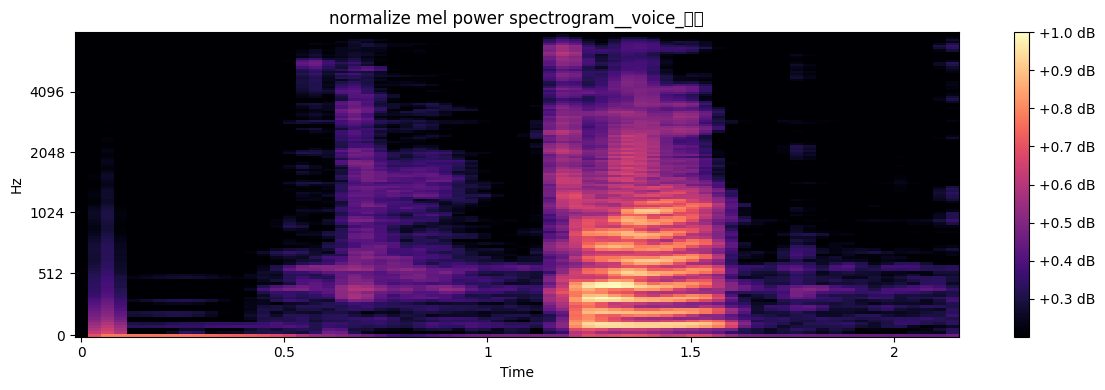

/home/s/venv/nltk/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/s/venv/nltk/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 53132 (\N{HANGUL SYLLABLE KWAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/s/venv/nltk/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54644 (\N{HANGUL SYLLABLE HAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


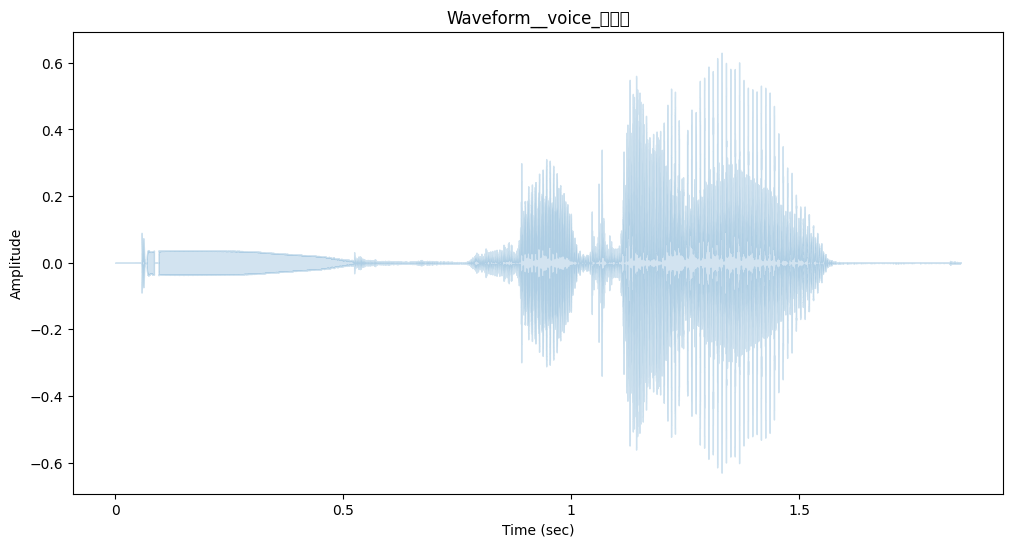

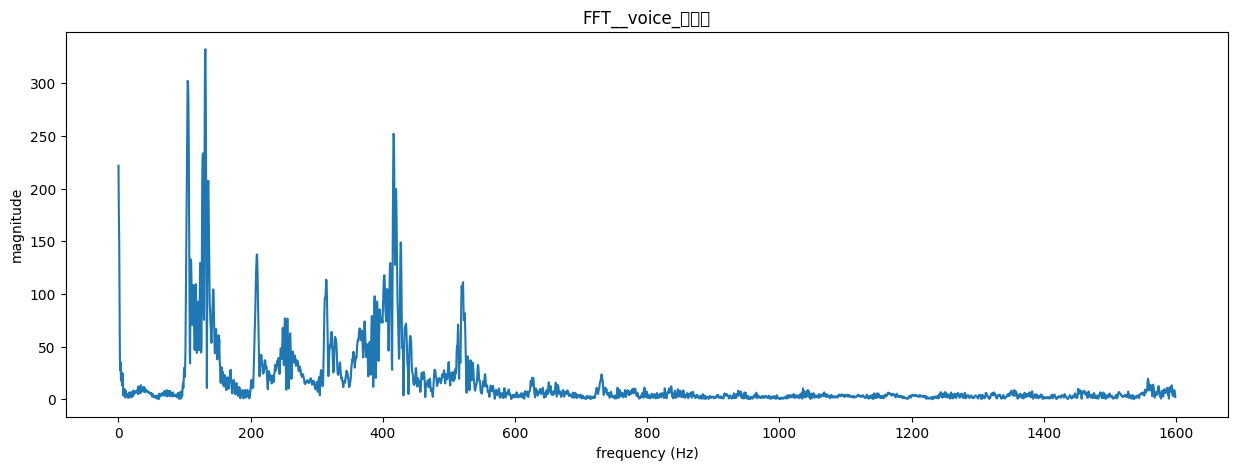

/tmp/ipykernel_41726/3718614336.py:35: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00015626  0.00070849
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(sample_sounds, sr=sr, n_mels=128, fmax=8000)
/tmp/ipykernel_41726/3718614336.py:43: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_41726/3718614336.py:43: UserWarning: Glyph 53132 (\N{HANGUL SYLLABLE KWAE}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_41726/3718614336.py:43: UserWarning: Glyph 54644 (\N{HANGUL SYLLABLE HAE}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_41726/3718614336.py:45: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  plt.savefig(path + file_path.split('/')[7].split('.')[0] + '.png')
/tmp/ipykernel_41726/3718614336.py:45: UserWarning: Glyph 53132 (\N{HANGUL SYL

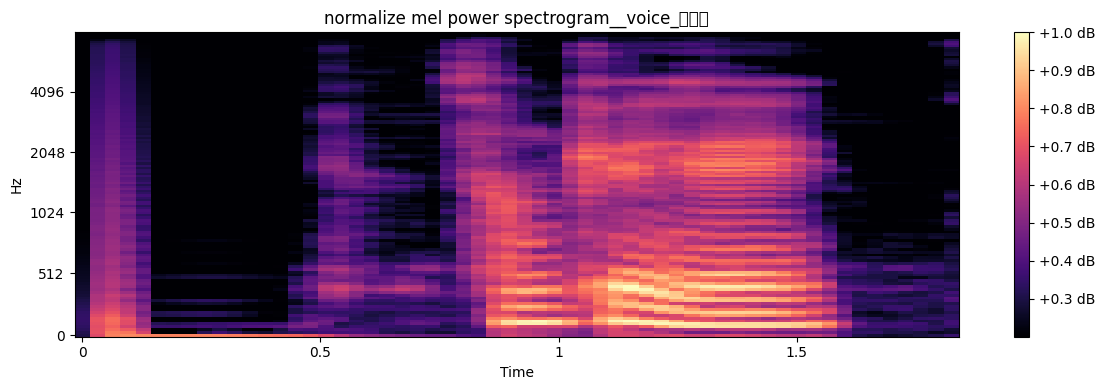

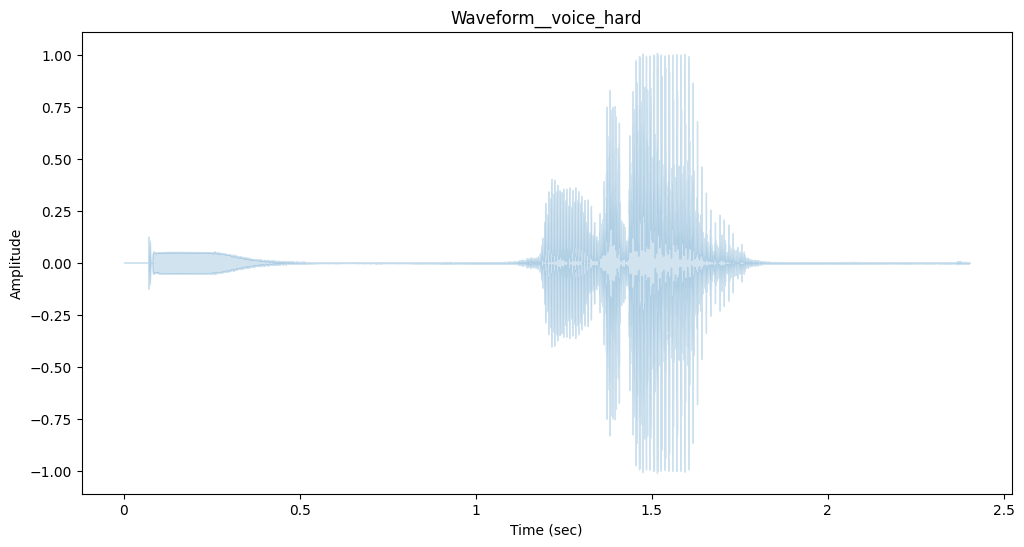

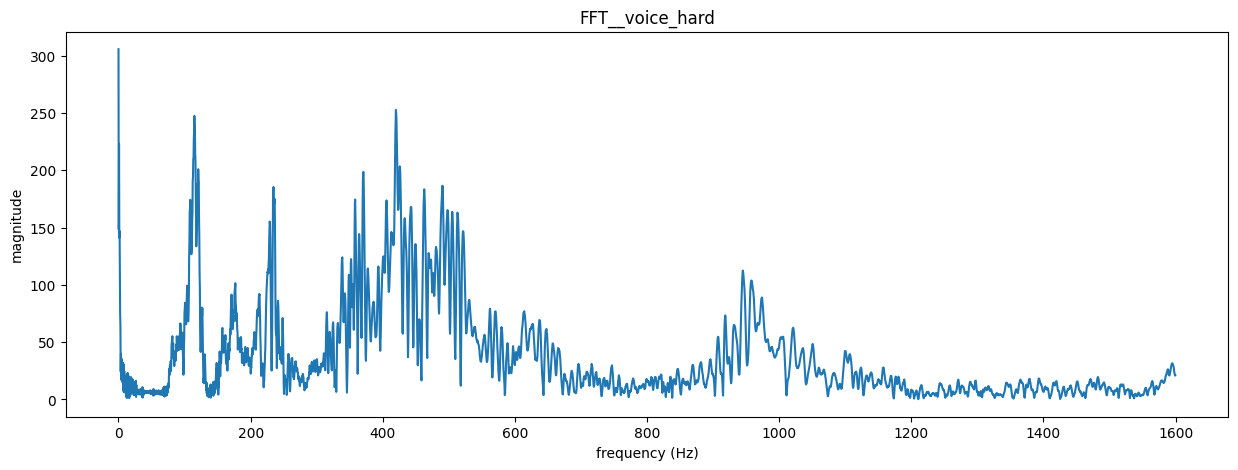

/tmp/ipykernel_41726/3718614336.py:35: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00118932 -0.00297221
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(sample_sounds, sr=sr, n_mels=128, fmax=8000)


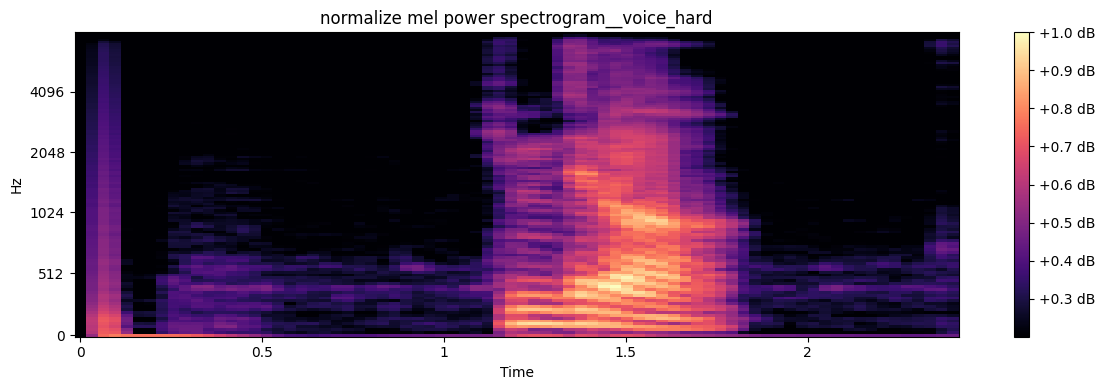

/home/s/venv/nltk/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/s/venv/nltk/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45124 (\N{HANGUL SYLLABLE GGEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/s/venv/nltk/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47084 (\N{HANGUL SYLLABLE REO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


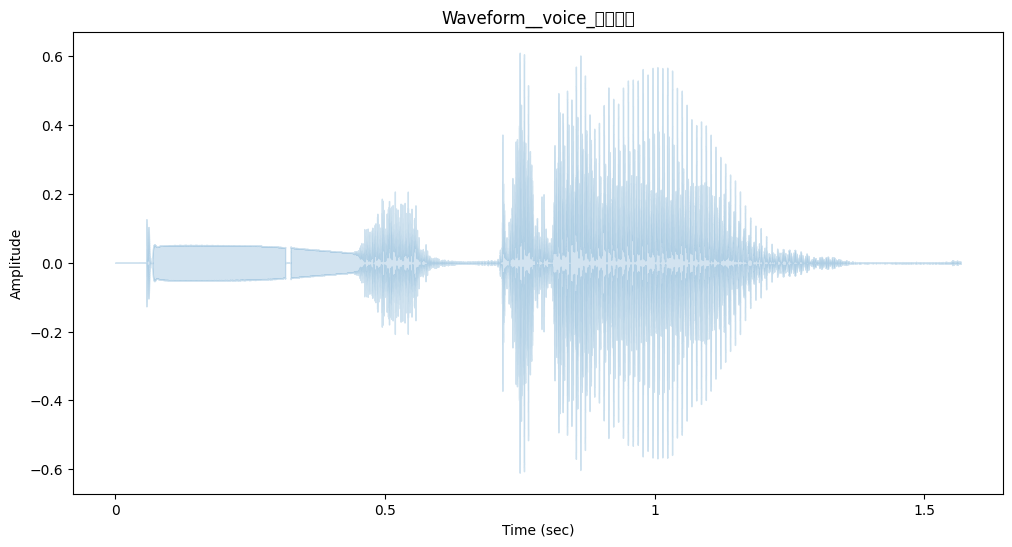

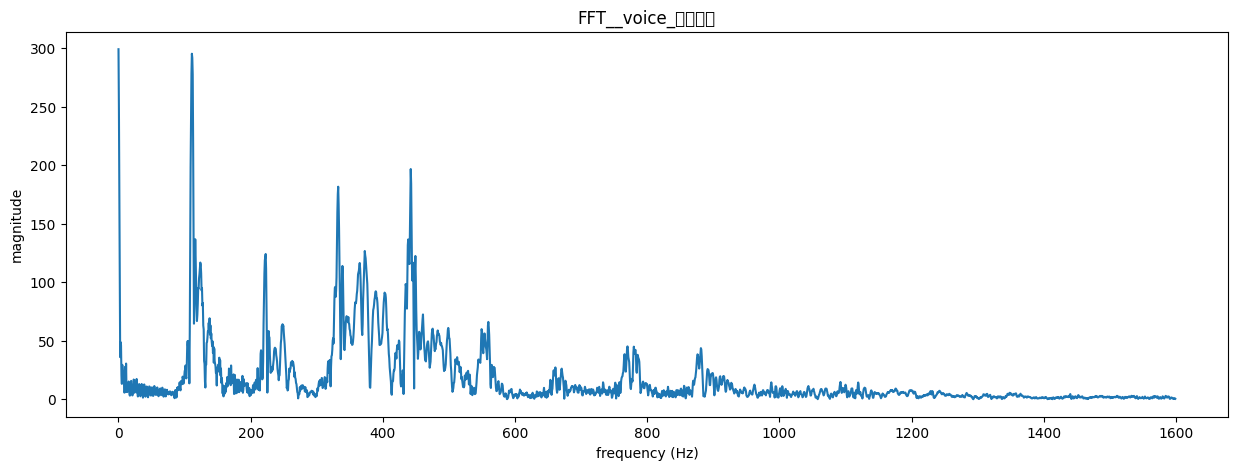

/tmp/ipykernel_41726/3718614336.py:35: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.9952166e-04
  7.9694255e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(sample_sounds, sr=sr, n_mels=128, fmax=8000)
/tmp/ipykernel_41726/3718614336.py:43: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_41726/3718614336.py:43: UserWarning: Glyph 45124 (\N{HANGUL SYLLABLE GGEU}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_41726/3718614336.py:43: UserWarning: Glyph 47084 (\N{HANGUL SYLLABLE REO}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_41726/3718614336.py:45: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  plt.savefig(path + file_path.split('/')[7].split('.')[0] + '.png')
/tmp/ipykernel_41726/3718614336.py:45: UserWarning: Glyph 45124 

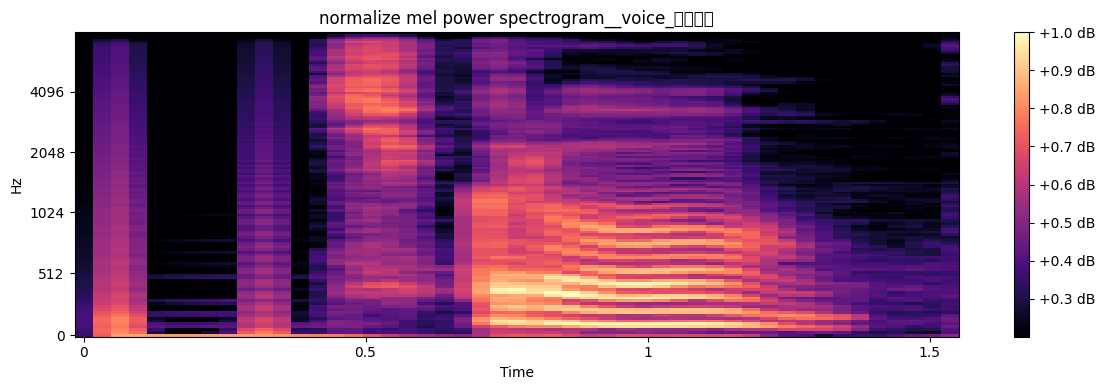

/home/s/venv/nltk/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50864 (\N{HANGUL SYLLABLE U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/s/venv/nltk/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


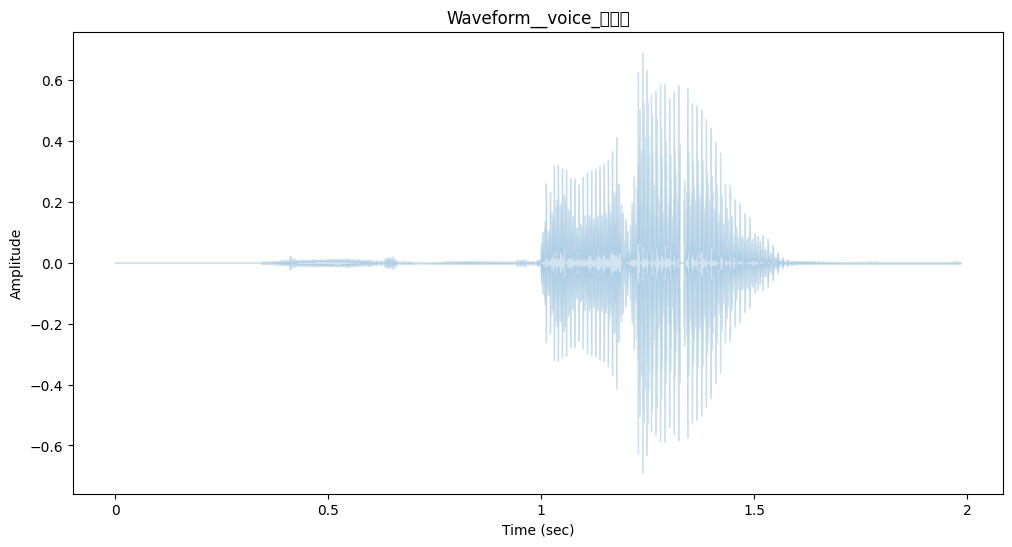

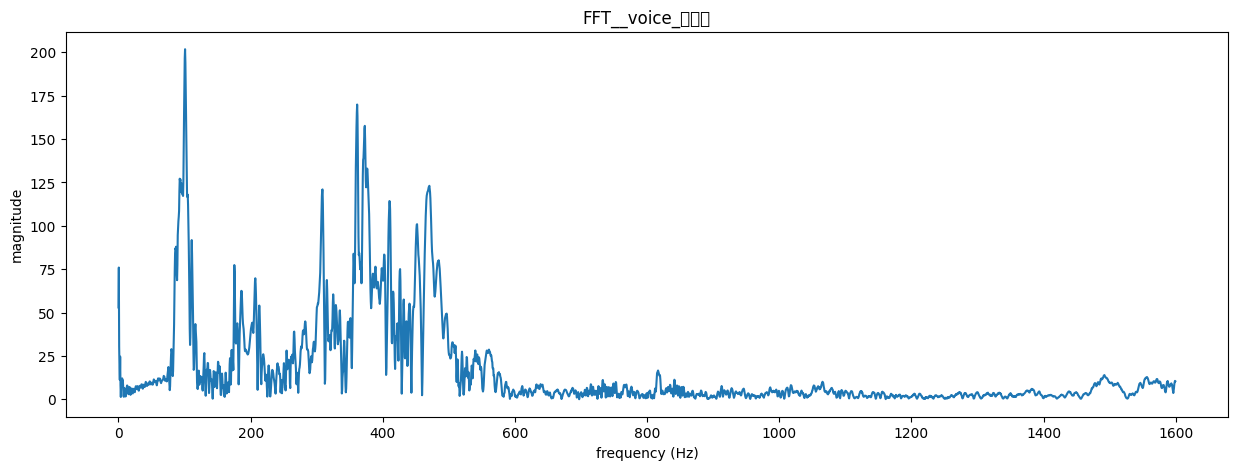

/tmp/ipykernel_41726/3718614336.py:35: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00115921 -0.00143666
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(sample_sounds, sr=sr, n_mels=128, fmax=8000)
/tmp/ipykernel_41726/3718614336.py:43: UserWarning: Glyph 50864 (\N{HANGUL SYLLABLE U}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_41726/3718614336.py:43: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_41726/3718614336.py:45: UserWarning: Glyph 50864 (\N{HANGUL SYLLABLE U}) missing from current font.
  plt.savefig(path + file_path.split('/')[7].split('.')[0] + '.png')
/tmp/ipykernel_41726/3718614336.py:45: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from current font.
  plt.savefig(path + file_path.split('/')[7].split('.')[0] + '.png')


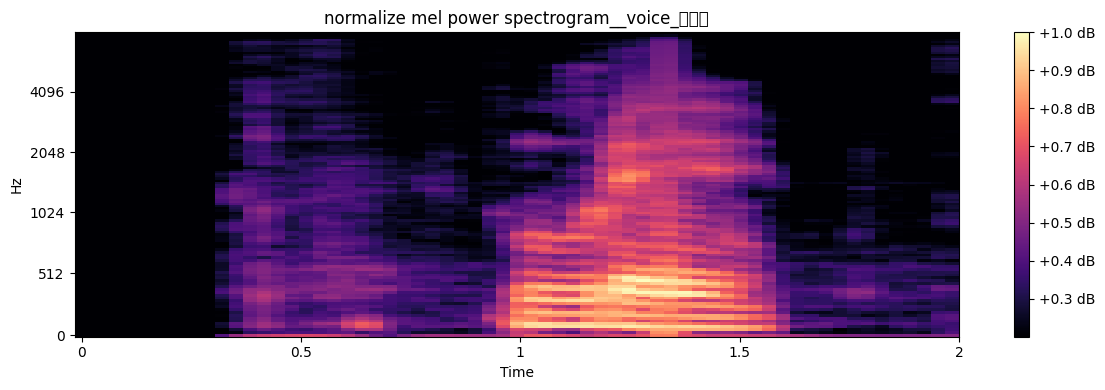

/home/s/venv/nltk/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45797 (\N{HANGUL SYLLABLE DAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/s/venv/nltk/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 52432 (\N{HANGUL SYLLABLE CYEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


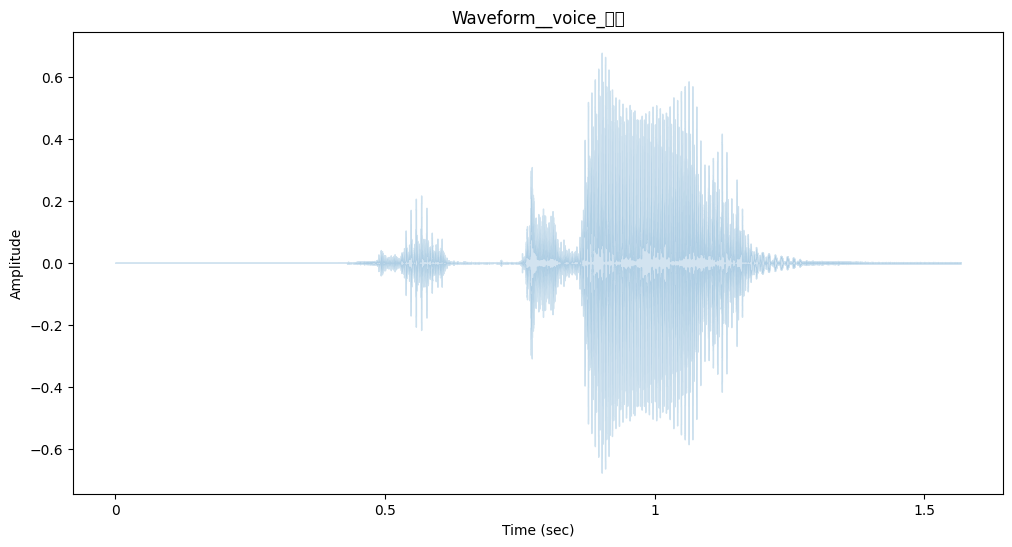

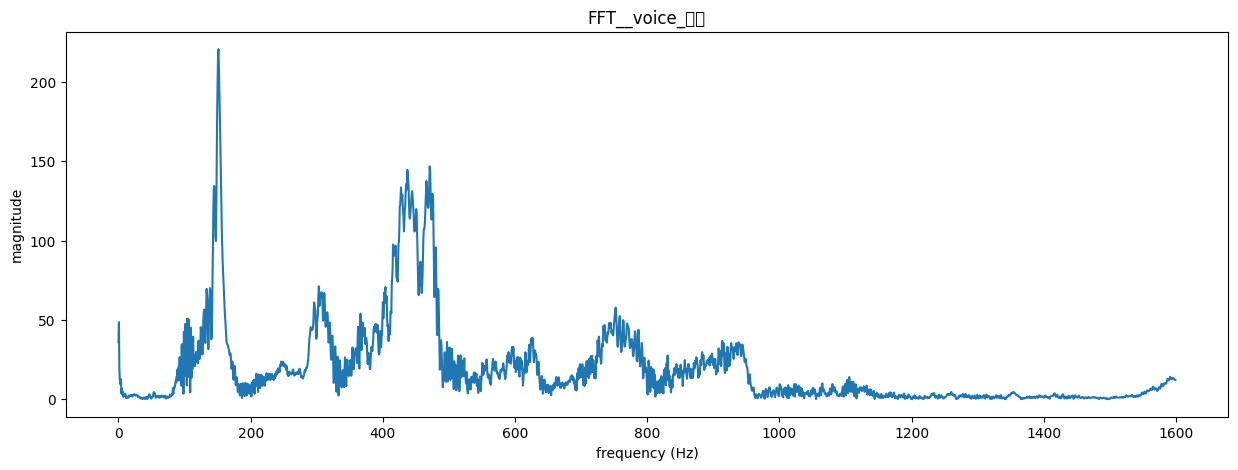

/tmp/ipykernel_41726/3718614336.py:35: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00162495 -0.00186316
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(sample_sounds, sr=sr, n_mels=128, fmax=8000)
/tmp/ipykernel_41726/3718614336.py:43: UserWarning: Glyph 45797 (\N{HANGUL SYLLABLE DAG}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_41726/3718614336.py:43: UserWarning: Glyph 52432 (\N{HANGUL SYLLABLE CYEO}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_41726/3718614336.py:45: UserWarning: Glyph 45797 (\N{HANGUL SYLLABLE DAG}) missing from current font.
  plt.savefig(path + file_path.split('/')[7].split('.')[0] + '.png')
/tmp/ipykernel_41726/3718614336.py:45: UserWarning: Glyph 52432 (\N{HANGUL SYLLABLE CYEO}) missing from current font.
  plt.savefig(path + file_path.split('/')[7].split('.')[0] + '.png')


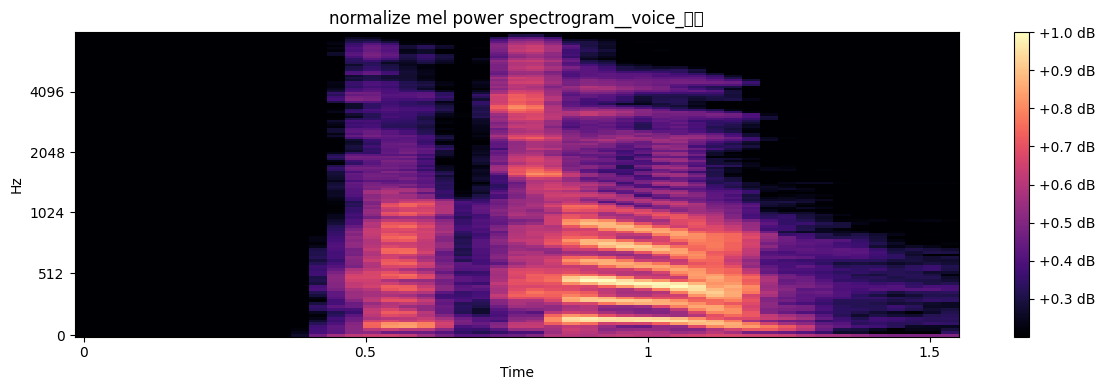

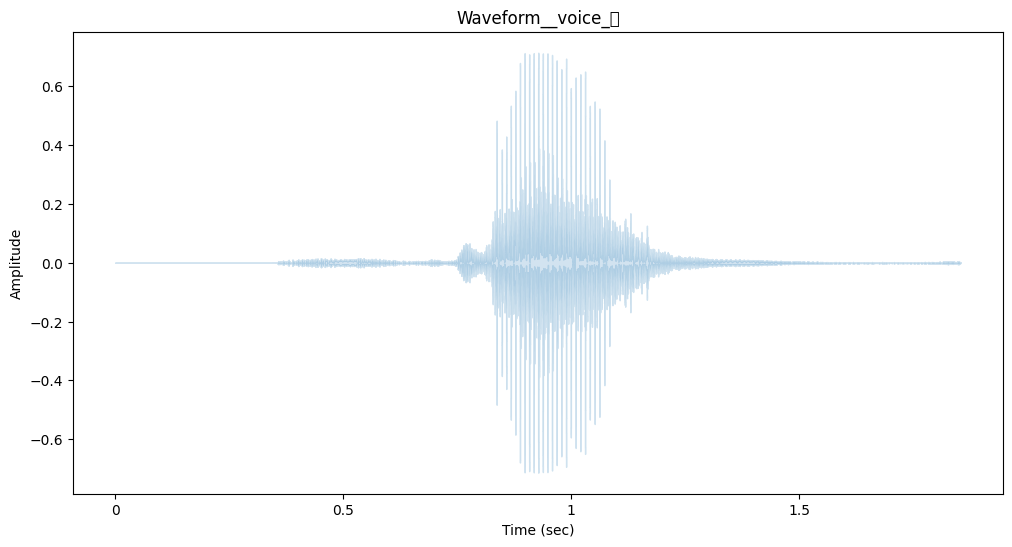

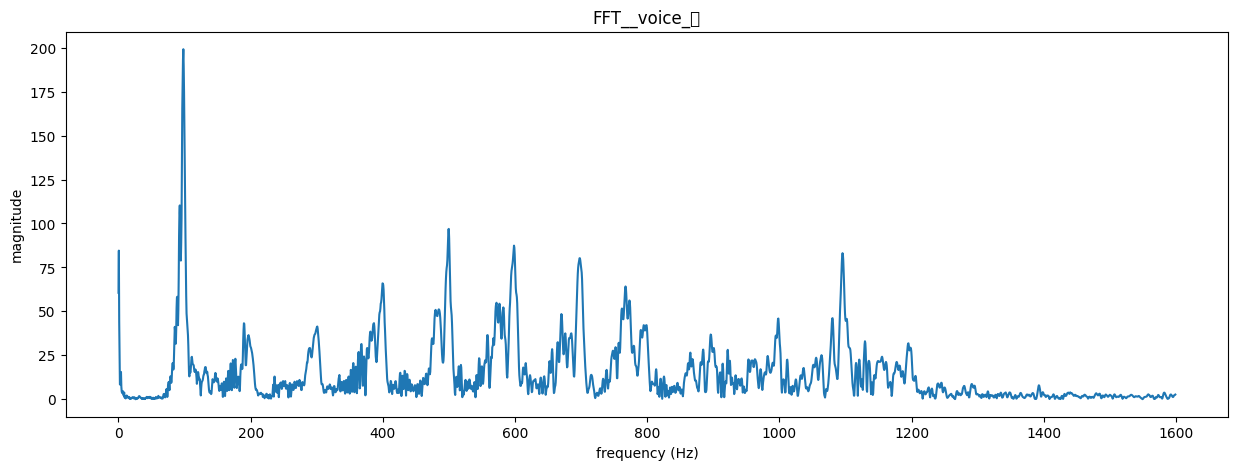

/tmp/ipykernel_41726/3718614336.py:35: FutureWarning: Pass y=[0.         0.         0.         ... 0.00074512 0.00041071 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(sample_sounds, sr=sr, n_mels=128, fmax=8000)


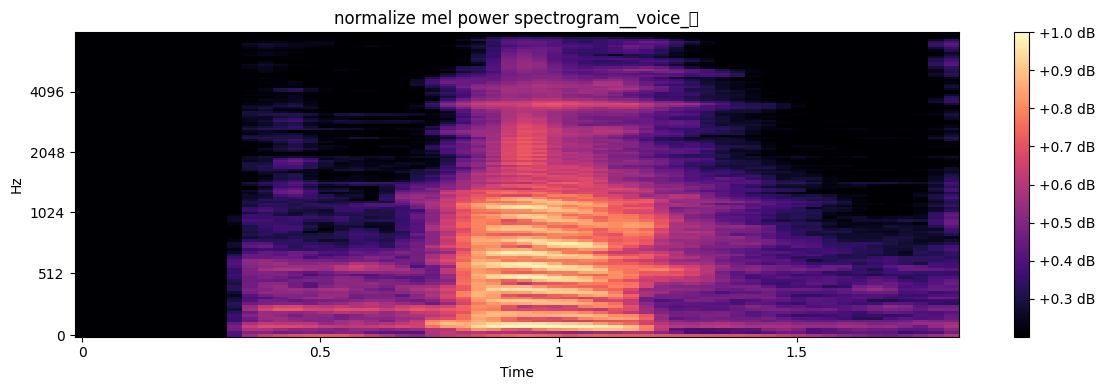

/home/s/venv/nltk/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/s/venv/nltk/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


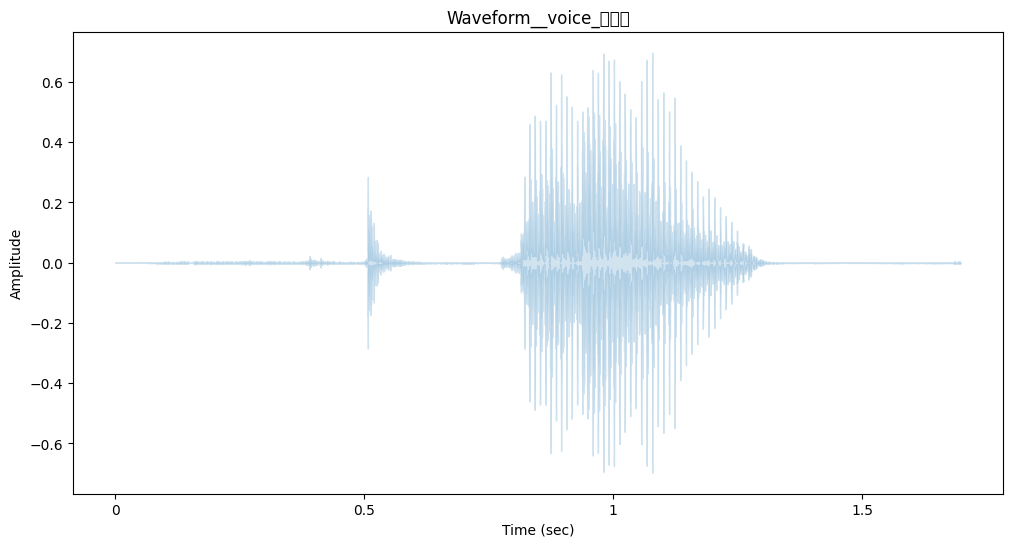

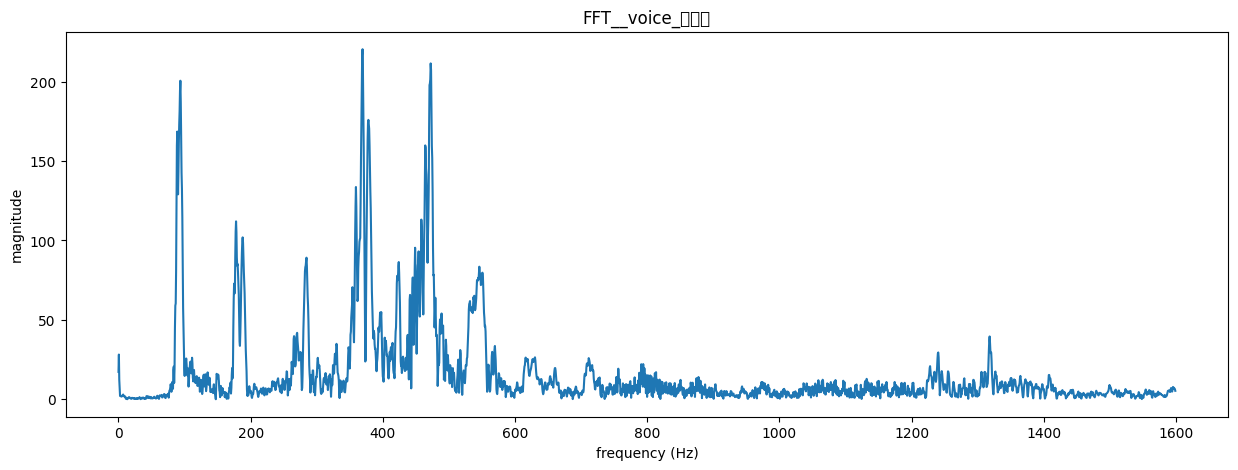

/tmp/ipykernel_41726/3718614336.py:35: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00077942 -0.00080164
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(sample_sounds, sr=sr, n_mels=128, fmax=8000)
/tmp/ipykernel_41726/3718614336.py:43: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_41726/3718614336.py:43: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_41726/3718614336.py:45: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  plt.savefig(path + file_path.split('/')[7].split('.')[0] + '.png')
/tmp/ipykernel_41726/3718614336.py:45: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.
  plt.savefig(path + file_path.split('/')[7].split('.')[0] + '.png')


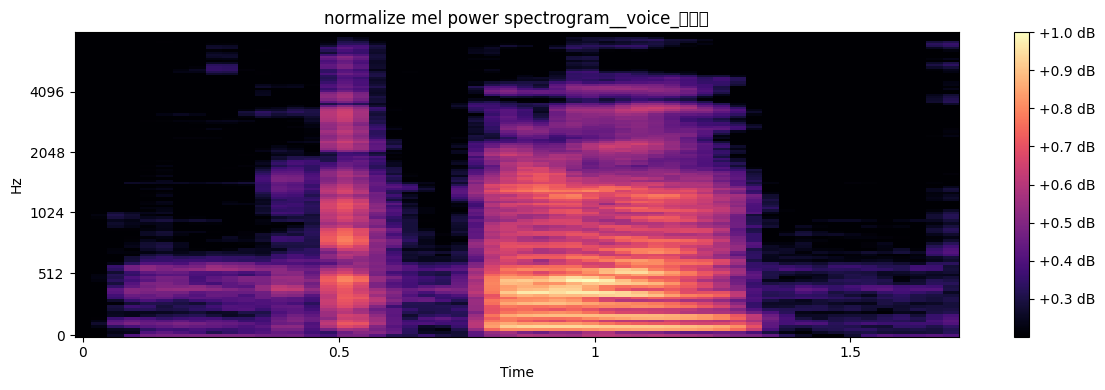

/home/s/venv/nltk/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/s/venv/nltk/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50506 (\N{HANGUL SYLLABLE ANH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


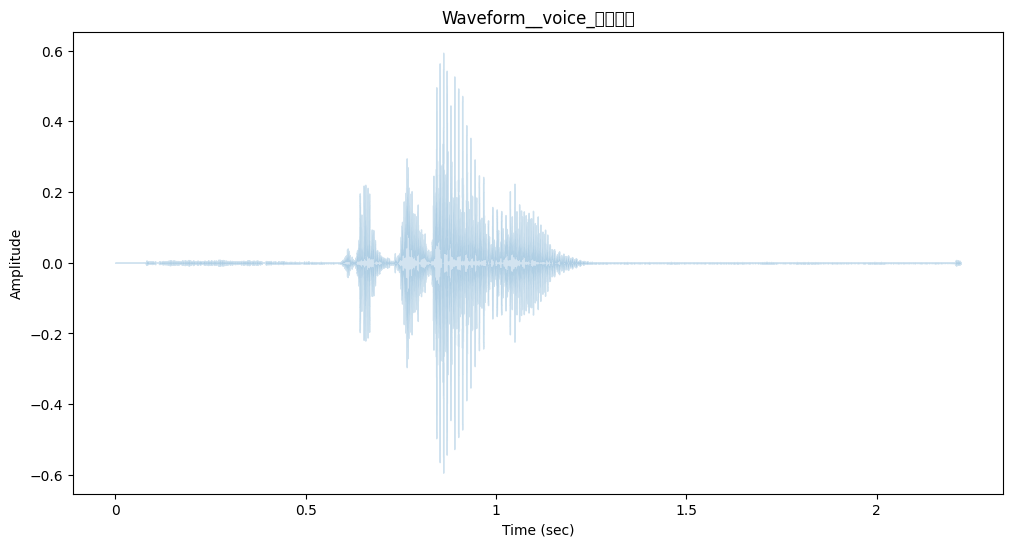

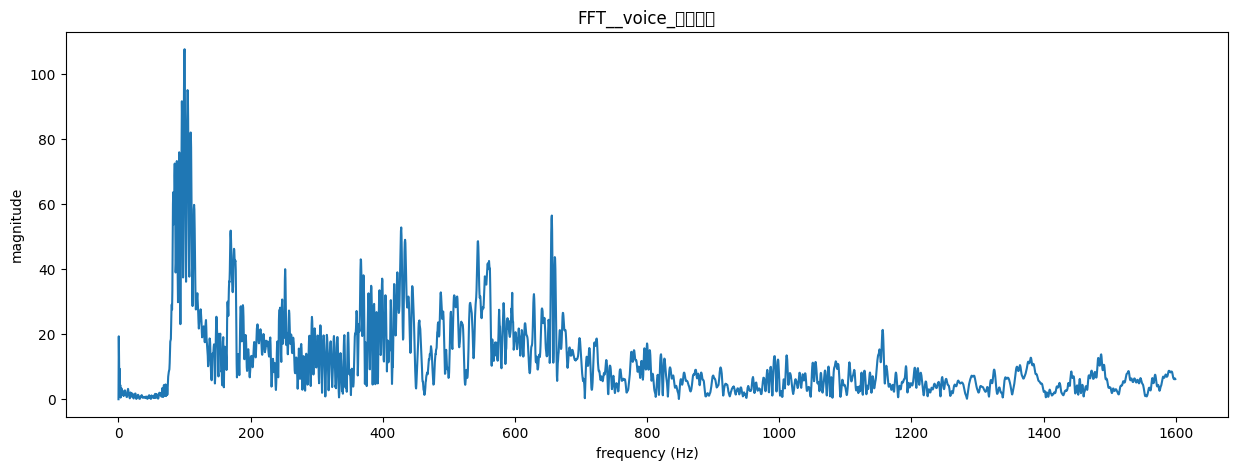

/tmp/ipykernel_41726/3718614336.py:35: FutureWarning: Pass y=[0.         0.         0.         ... 0.00040207 0.00057894 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(sample_sounds, sr=sr, n_mels=128, fmax=8000)
/tmp/ipykernel_41726/3718614336.py:43: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_41726/3718614336.py:43: UserWarning: Glyph 50506 (\N{HANGUL SYLLABLE ANH}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_41726/3718614336.py:45: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  plt.savefig(path + file_path.split('/')[7].split('.')[0] + '.png')
/tmp/ipykernel_41726/3718614336.py:45: UserWarning: Glyph 50506 (\N{HANGUL SYLLABLE ANH}) missing from current font.
  plt.savefig(path + file_path.split('/')[7].split('.')[0] + '.png')


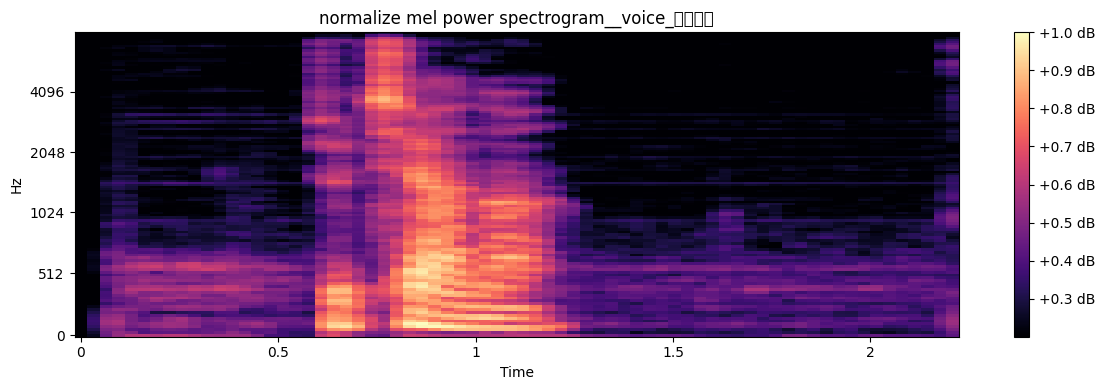

/home/s/venv/nltk/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/s/venv/nltk/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/s/venv/nltk/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49899 (\N{HANGUL SYLLABLE SILH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/s/venv/nltk/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


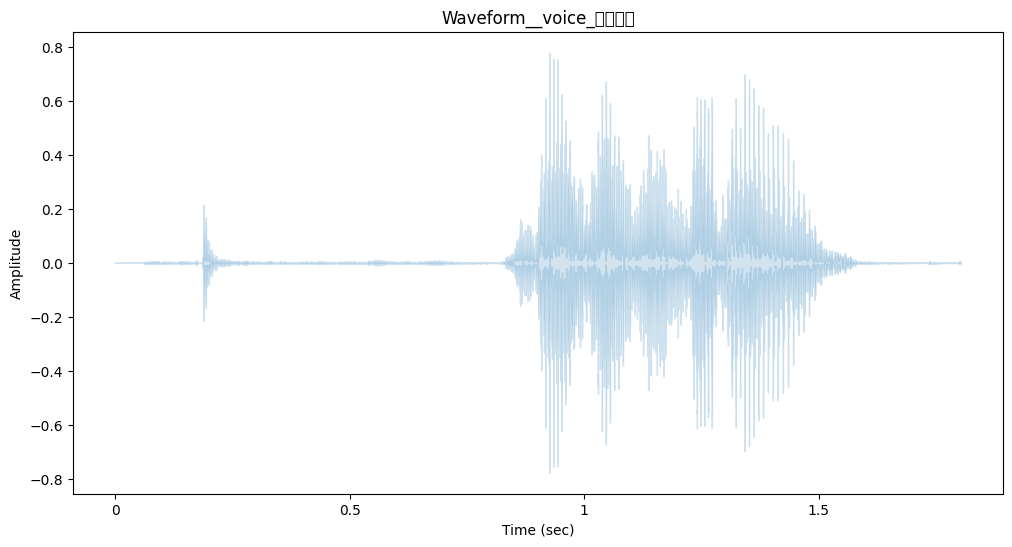

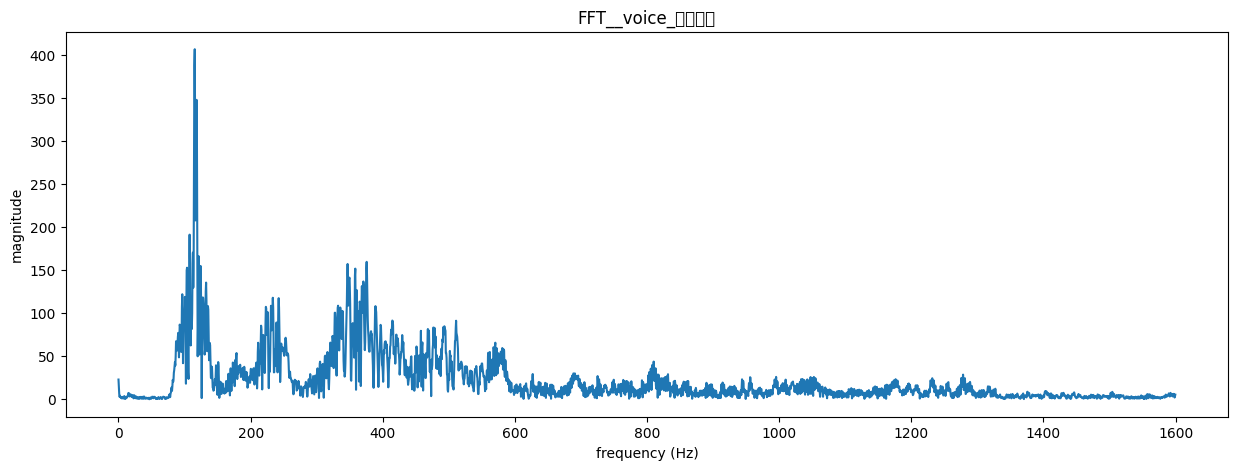

/tmp/ipykernel_41726/3718614336.py:35: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00505181  0.00037378
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(sample_sounds, sr=sr, n_mels=128, fmax=8000)
/tmp/ipykernel_41726/3718614336.py:43: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_41726/3718614336.py:43: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_41726/3718614336.py:43: UserWarning: Glyph 49899 (\N{HANGUL SYLLABLE SILH}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_41726/3718614336.py:43: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_41726/3718614336.py:45: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from current font.
  plt.savefig(p

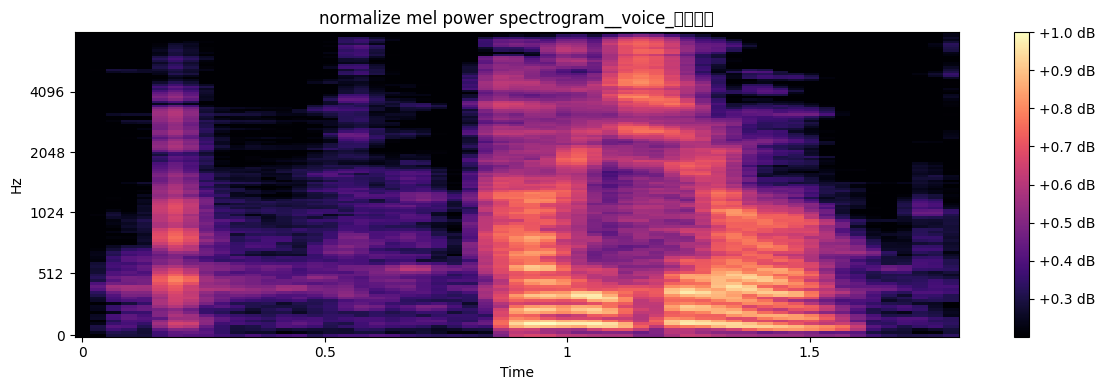

/home/s/venv/nltk/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/s/venv/nltk/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44040 (\N{HANGUL SYLLABLE GAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/s/venv/nltk/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44163 (\N{HANGUL SYLLABLE GEOS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/s/venv/nltk/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44057 (\N{HANGUL SYLLABLE GAT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


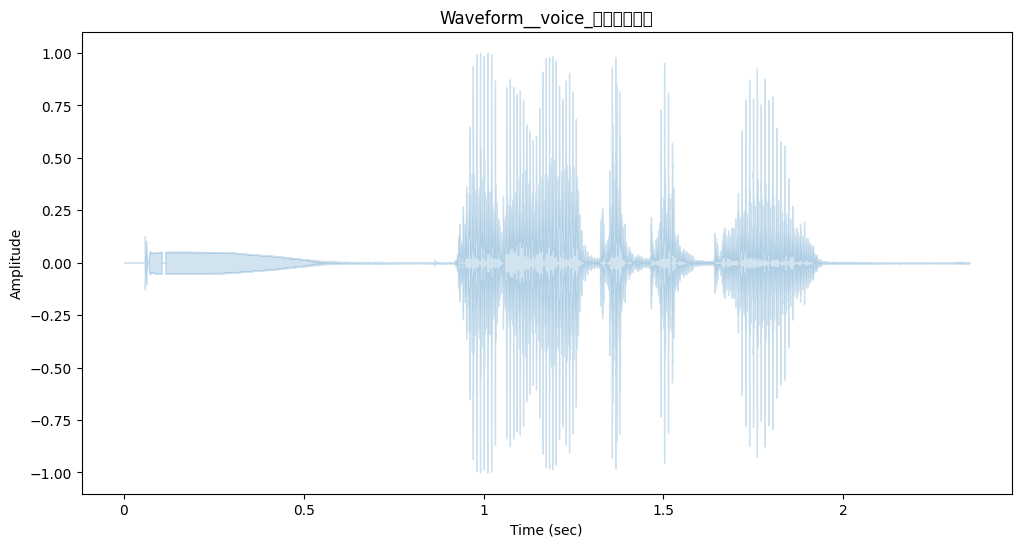

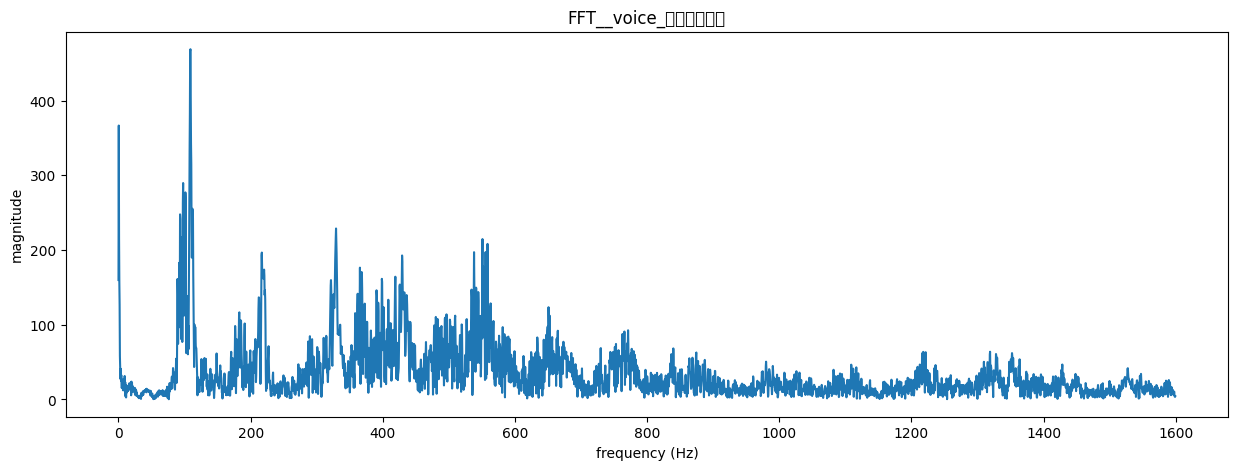

/tmp/ipykernel_41726/3718614336.py:35: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00118275 -0.00120679
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(sample_sounds, sr=sr, n_mels=128, fmax=8000)
/tmp/ipykernel_41726/3718614336.py:43: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_41726/3718614336.py:43: UserWarning: Glyph 44040 (\N{HANGUL SYLLABLE GAL}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_41726/3718614336.py:43: UserWarning: Glyph 44163 (\N{HANGUL SYLLABLE GEOS}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_41726/3718614336.py:43: UserWarning: Glyph 44057 (\N{HANGUL SYLLABLE GAT}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_41726/3718614336.py:45: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  plt.savef

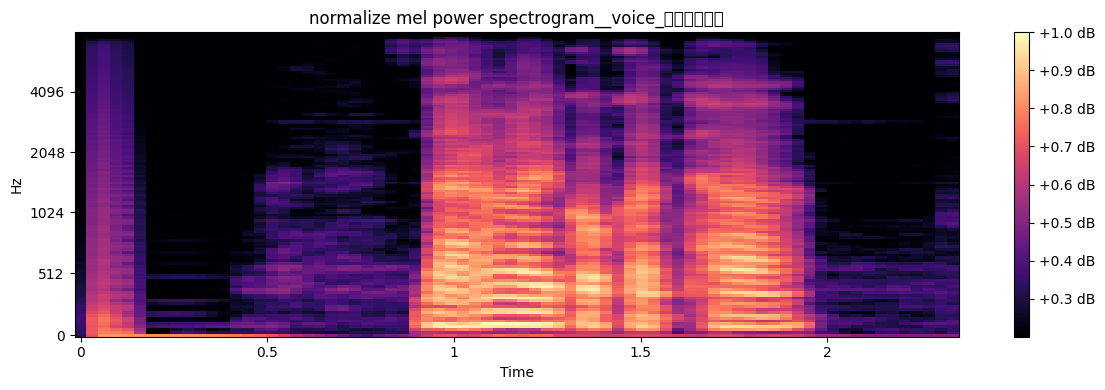

In [3]:
import numpy as np
import matplotlib as mpl  
import matplotlib.pyplot as plt
import os
import librosa
import librosa.display
import IPython.display as ipd
import hgtk # https://github.com/bluedisk/hangul-toolkit

#음원 >> time domain을 축으로 그리는 함수
def draw_wave(sample_sounds, sample_rate):
    plt.figure(figsize=(12,6))
    librosa.display.waveshow(sample_sounds, sample_rate, alpha=0.2)
    plt.xlabel("Time (sec)"); plt.ylabel("Amplitude")
    plt.title("Waveform__" + file_path.split('/')[7].split('.')[0]); plt.show(); 

# FFT결과를 그리는 함수
def plot_magnitude_spectrum(sample_sounds, sr, freq_ratio=1):
    ft = np.fft.fft(sample_sounds)
    magnitude = np.abs(ft)
    frequency = np.linspace(0, sr, len(magnitude))
    frequency_bin = int(len(frequency) * freq_ratio)
    # FFT변환한 결과로 나온 spectrum은 대칭구조의 모습을 보인다.
    # freq_ration값을 곱해서 원하는 배수만큼 자를 수 있다.
    # frequency_bin :주파수 해상도
    plt.figure(figsize=(15, 5))
    plt.plot(frequency[:frequency_bin], magnitude[:frequency_bin])
    plt.title('FFT__' + file_path.split('/')[7].split('.')[0])
    plt.xlabel('frequency (Hz)')
    plt.ylabel('magnitude')
    plt.show()

#scaling한 mel_spectogram 그리는 함수
def plot_nomalize_mel_spectrogram(sample_sounds, sr):
    S = librosa.feature.melspectrogram(sample_sounds, sr=sr, n_mels=128, fmax=8000) 
    S_dB= librosa.power_to_db(S, ref=np.max)
    min_level_db = -100
    normalize_spectro =  np.clip((S_dB - min_level_db) / -min_level_db, 0, 1)
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(normalize_spectro, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+0.1f dB')
    plt.title('normalize mel power spectrogram__' + file_path.split('/')[7].split('.')[0])
    plt.tight_layout()
    path = '/home/s/Ai/nltk_s/data/plot/'
    plt.savefig(path + file_path.split('/')[7].split('.')[0] + '.png')
    plt.show()
    return normalize_spectro
    
def mel_specto_split(jamo_sent, normalize_spectro, time_frame_num, char_frame_num):
    mpl.rc('font', family="NanumBarunGothic")
    mel_freq_num = 140
    plt.figure(figsize=(20, 150))
    jamo_sent_size = len(jamo_sent)
    for i in range(0, jamo_sent_size):
        plt.subplot(jamo_sent_size, 5, i+1)
        start_position = (i * char_frame_num) - 1
        end_position = ((i+1) * char_frame_num) + 1
        if(start_position < 0):
            start_position = 0
            end_position = end_position + 1
        if(end_position > time_frame_num):
            start_position = start_position - (end_position - time_frame_num)
            end_position = time_frame_num
        window = normalize_spectro[0:mel_freq_num, start_position:end_position]
        plt.pcolor(window, cmap='jet')
        plt.title(str(jamo_sent[i]))
        plt.colorbar()



voice_path = '/home/s/Ai/nltk_s/data/voice/'

for (root, directories, files) in os.walk(voice_path):
    for d in directories:
        d_path = os.path.join(root, d)
        

    for file in files:
        file_path = os.path.join(root, file)
        voice, sr = librosa.load(file_path, sr=16000)
        
        draw_wave(voice, sr)
        plot_magnitude_spectrum(voice, sr, 0.1) #유효한 스펙트럼까지 슬라이싱
        plot_nomalize_mel_spectrogram(voice, sr)
        
       